In [16]:
import git
import sys
import os
import time

import model.datasets.argoverse.dataset as dataset
import model.datasets.argoverse.dataset_utils as dataset_utils 

from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.visualization.visualize_sequences import viz_sequence
from argoverse.map_representation.map_api import ArgoverseMap

repo = git.Repo('.', search_parent_directories=True)
BASE_DIR = repo.working_tree_dir
sys.path.append(BASE_DIR)

# Set root_dir to the correct path to your dataset folder

root_dir = os.path.join(BASE_DIR,'data/datasets/argoverse/motion-forecasting/val/data/')

avm = ArgoverseMap()
afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 39472


Viz seq:  13.103257179260254
Candidate centerlines:  0.012357473373413086
Get lane direction:  0.0058515071868896484


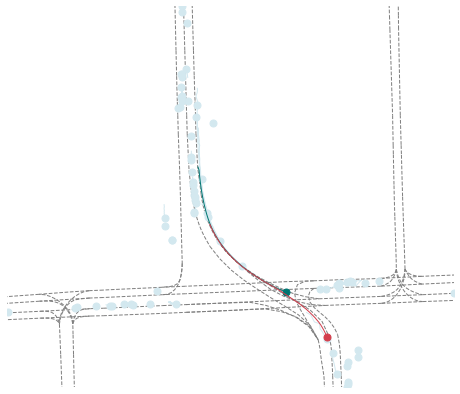

In [18]:
seq_path = f"{root_dir}/11.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

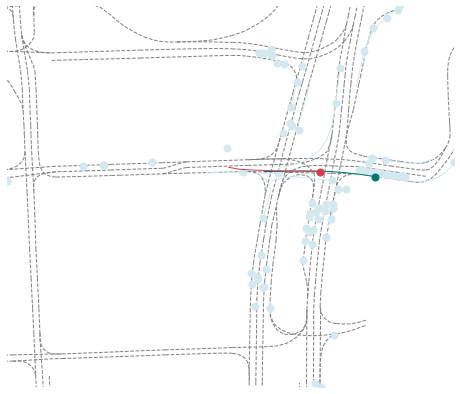

Viz seq:  13.892898082733154


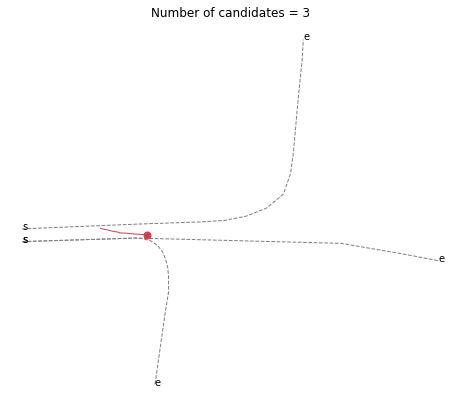

Candidate centerlines:  0.11422109603881836


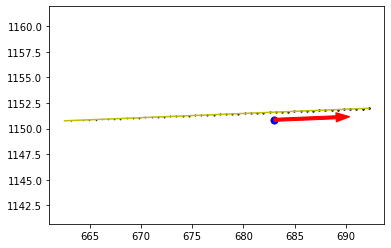

Get lane direction:  0.5481903553009033


In [19]:
seq_path = f"{root_dir}/18359.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)